# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu^*}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import (ARIMA, Stats, Source, Est, PlotType)
from lib import (stack, fpoints, fcurve, curve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1.0
nsample = 1000

def cumu_mean_plot(φ, σ, μ, nsample):
    ar = Source.AR_OFFSET.create(φ=[φ], σ=σ, μ=μ, npts=nsample)
    mean = Stats.Func.CUMU_MEAN.apply(ar)
    ar1_mean = ARIMA.Func.AR1_OFFSET_MEAN.apply(ar, φ=φ, μ=μ)
    fcurve(data=mean, func=ar1_mean, title_offset=1.025, plot_type=PlotType.XLOG)
    
def cumu_sd_plot(φ, σ, μ, nsample):
    ar = Source.AR_OFFSET.create(φ=[φ], σ=σ, μ=μ, npts=nsample)
    sd = Stats.Func.CUMU_SD.apply(ar)
    ar1_sd = ARIMA.Func.AR1_OFFSET_SD.apply(ar, φ=φ, σ=σ)
    fcurve(data=sd, func=ar1_sd, title_offset=1.025, plot_type=PlotType.XLOG)
    
def comparison_plot_μ(μ_vals, ylim, title, *params):
    labels = [r"$μ^*=$" + f"{val}" for val in μ_vals]
    scan = Source.AR_OFFSET.create_parameter_scan(*params)
    stack(scan, ylim=ylim, title=title, labels=labels)
    
def comparison_plot_φ(φ_vals, ylim, title, *params):
    labels = [f"φ={val}" for val in φ_vals] 
    scan = Source.AR_OFFSET.create_parameter_scan(*params)
    stack(scan, ylim=ylim, title=title, labels=labels)

## Simulation $\varphi$ Scan

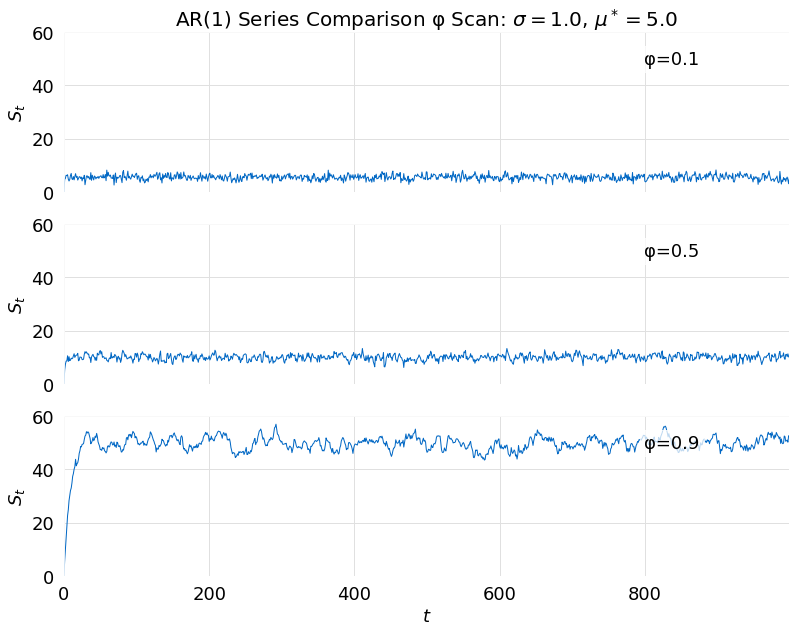

In [3]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: $σ={{{σ}}}$, $μ^*={{{μ}}}$"
φ_vals = [0.1, 0.5, 0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [0.0, 60.0], title, *params)

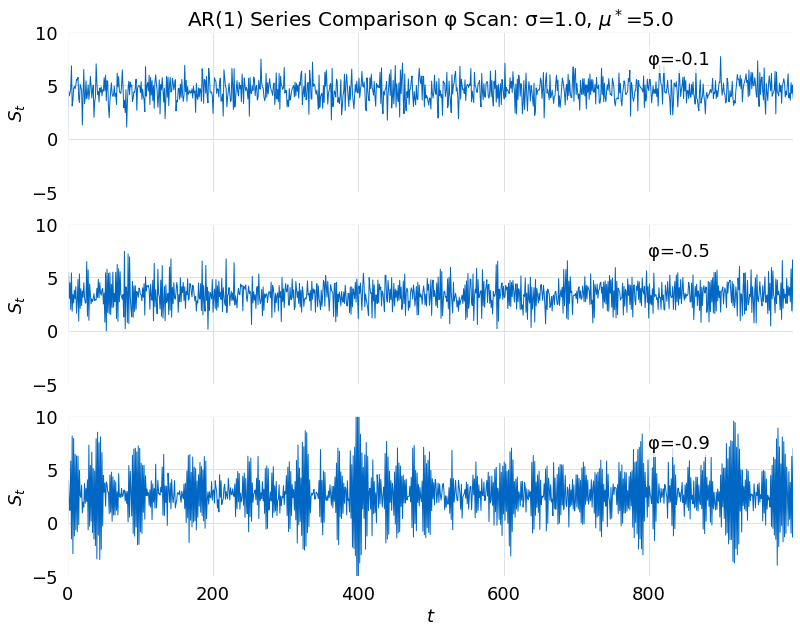

In [4]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ_vals = [-0.1, -0.5, -0.9]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for φ in φ_vals]
comparison_plot_φ(φ_vals, [-5.0, 10.0], title, *params)

## Simulation $\mu^*$ Scan

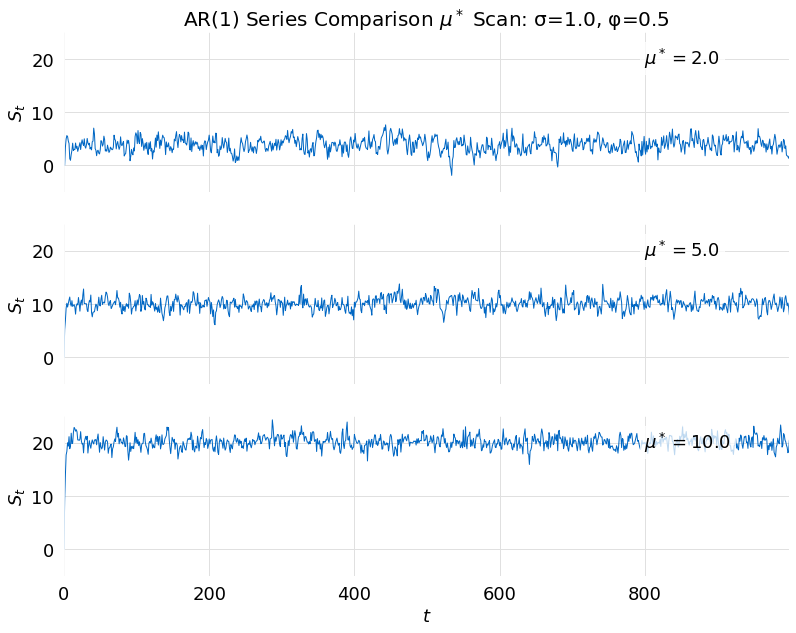

In [5]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [2.0, 5.0, 10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-5.0, 25.0], title, *params)

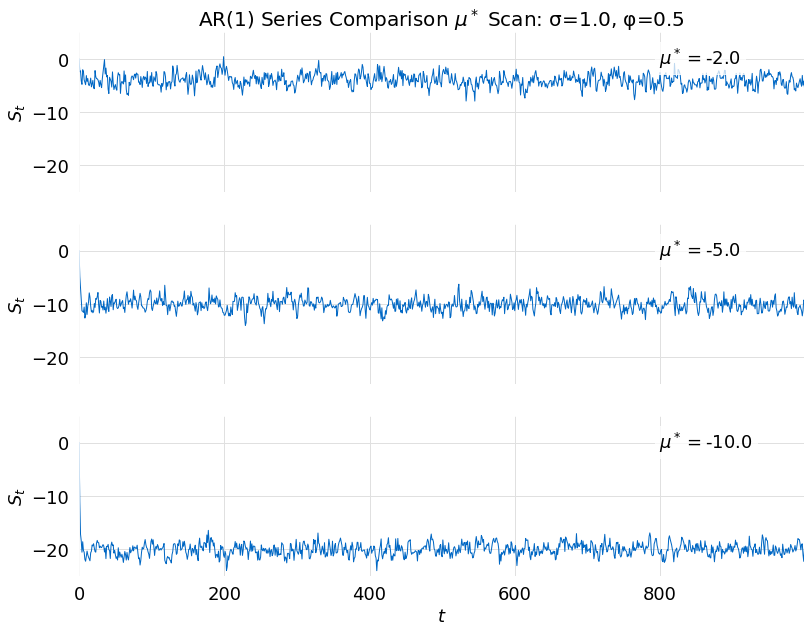

In [6]:
title = f"AR(1) Series Comparison " + r"$\mu^*$" + f" Scan: σ={σ}, φ={φ}"
μ_vals = [-2.0, -5.0, -10.0]
params = [{"φ": [φ], "σ": σ, "μ": μ, "npts": nsample} for μ in μ_vals]
comparison_plot_μ(μ_vals, [-25.0, 5.0], title, *params)

## Mean

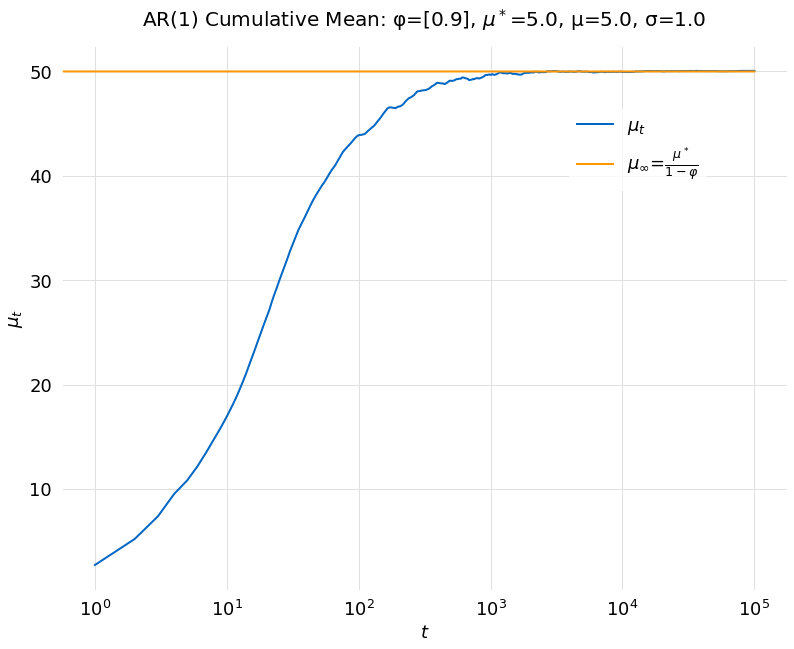

In [7]:
φ = 0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

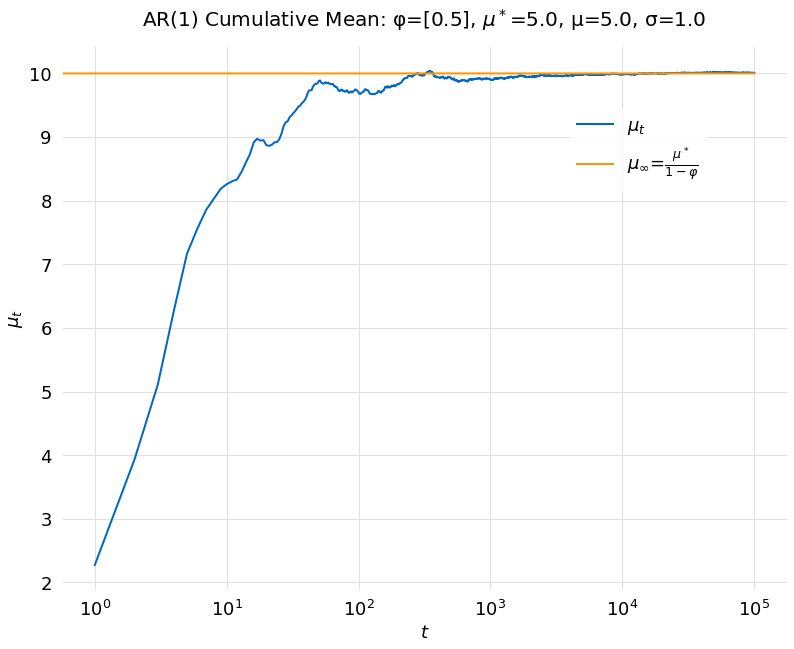

In [8]:
φ = 0.5
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

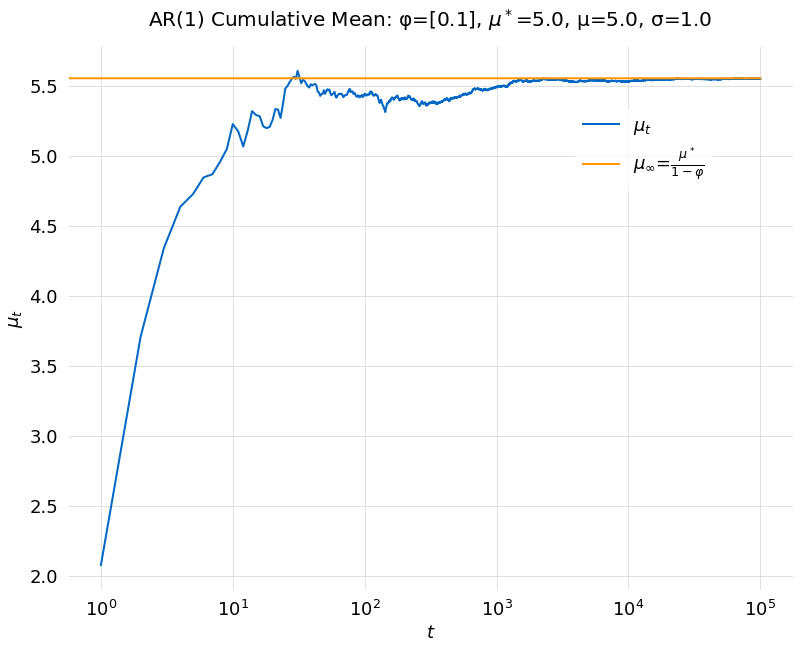

In [9]:
φ = 0.1
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

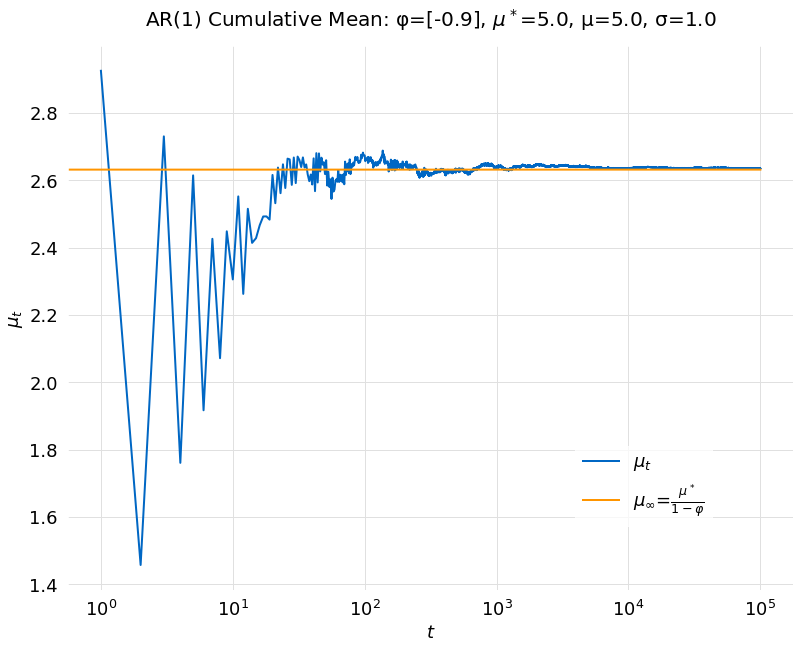

In [10]:
φ = -0.9
μ = 5.0
nsample = 100000
cumu_mean_plot(φ, σ, μ, nsample)

## Standard Deviation

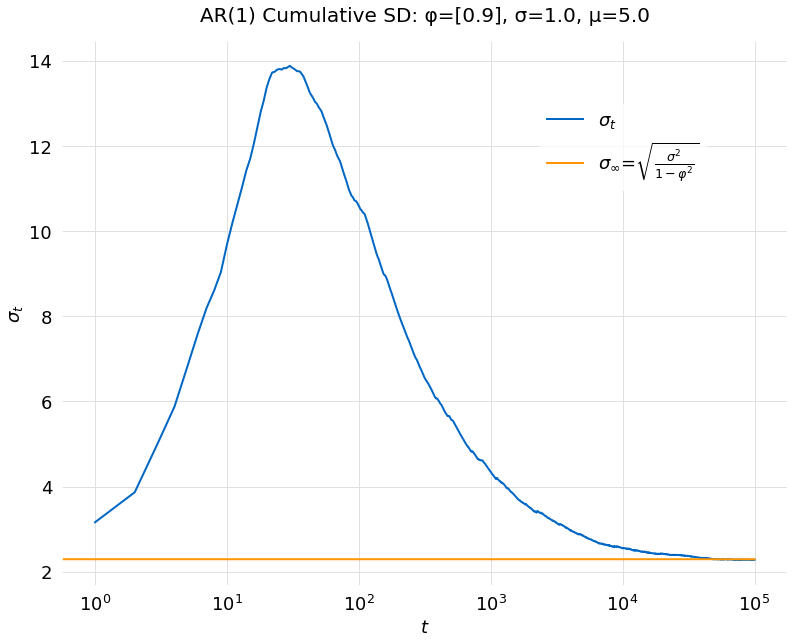

In [11]:
φ = 0.9
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

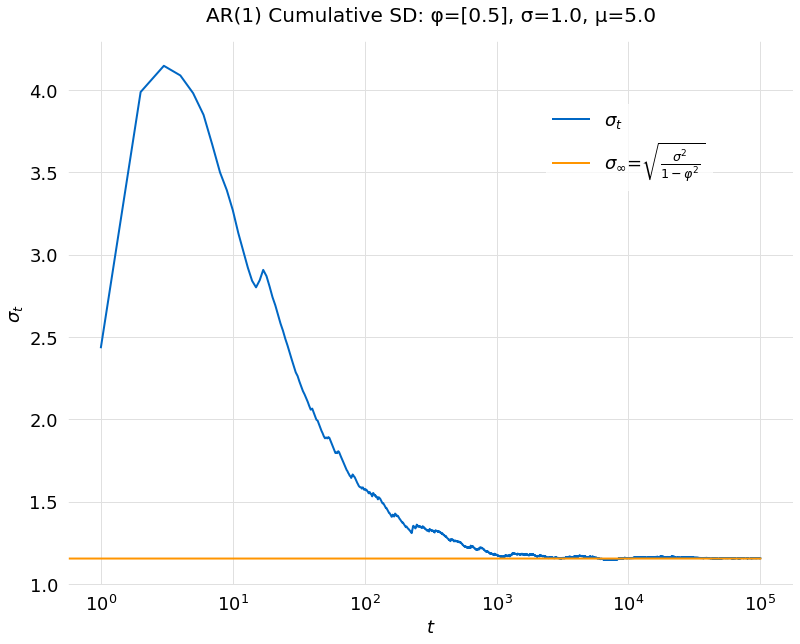

In [12]:
φ = 0.5
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

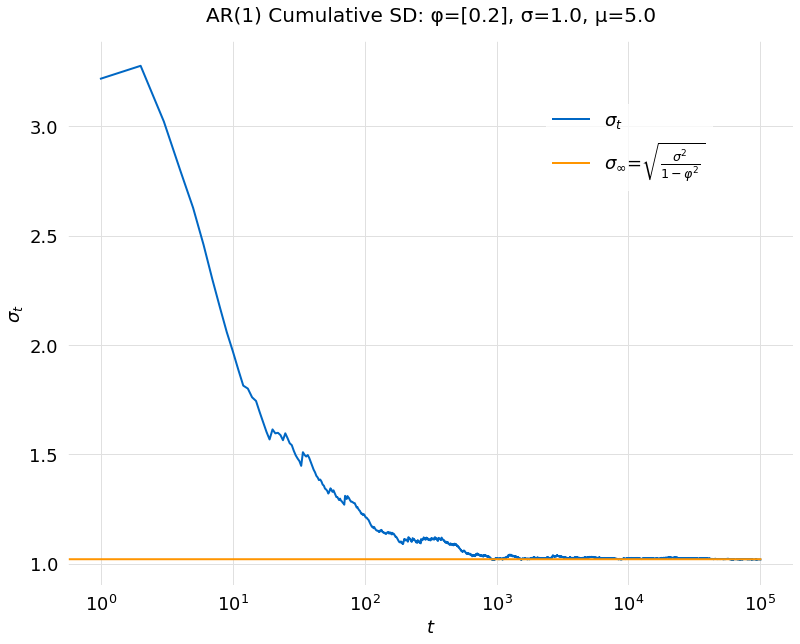

In [13]:
φ = 0.2
nsample = 100000
cumu_sd_plot(φ, σ, μ, nsample)

## Parameter Estimation

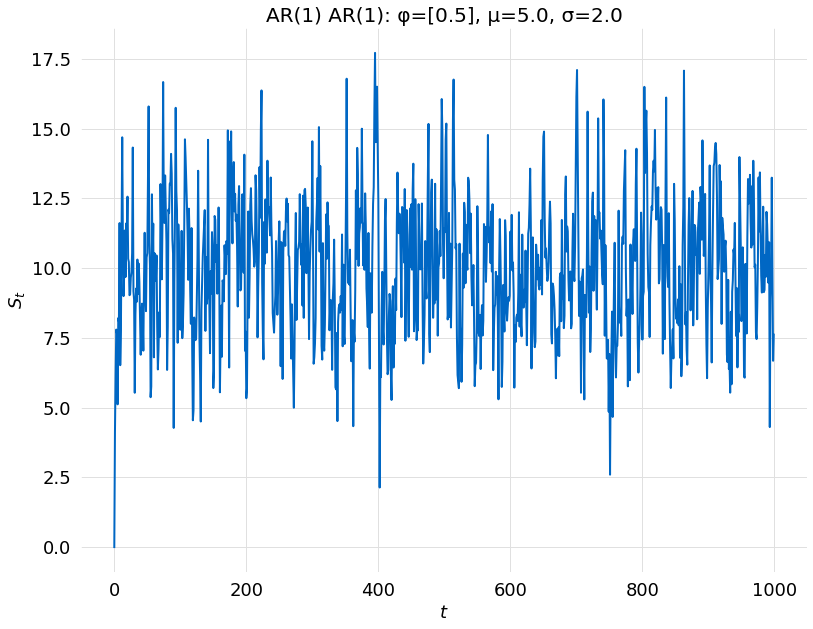

In [14]:
φ = 0.5
μ = 5.0
σ = 2.0
nsample = 1000
df = Source.AR_OFFSET.create(φ=[φ], μ=μ, σ=σ, npts=nsample)
curve(df)

In [15]:
results = Est.AR_OFFSET.perform(df, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2139.018
Date:                Sat, 18 Jun 2022   AIC                           4284.036
Time:                        16:36:26   BIC                           4298.759
Sample:                             0   HQIC                          4289.632
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9856      0.139     71.762      0.000       9.713      10.258
ar.L1          0.5421      0.026     20.620      0.000       0.491       0.594
sigma2         4.2199      0.177     23.890      0.000       3.874       4.566
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 4.05
Prob(Q):                              0.77   Prob(JB):                         0.13
Heteroskedasticity (H):               0.94   Skew:                             0.04
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
df.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 16:36:26',
 'Type': <Source.AR_OFFSET: 'AR_OFFSET'>,
 'Name': 'AR(1)-Simulation-cc49e632-a4d1-4c96-90be-37ef5919bb96',
 'SchemaIterations': None,
 'AR_OFFSET': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.5], 'μ': 5.0, 'σ': 2.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <Est.AR_OFFSET: 'AR_OFFSET'>,
    'Const': {'Estimate': 9.985619799719522,
     'Error': 0.13914926800418442,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.5421175064735815,
      'Error': 0.026290722826381095,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'}],
    'Sigma2': {'Estimate': 4.2198521

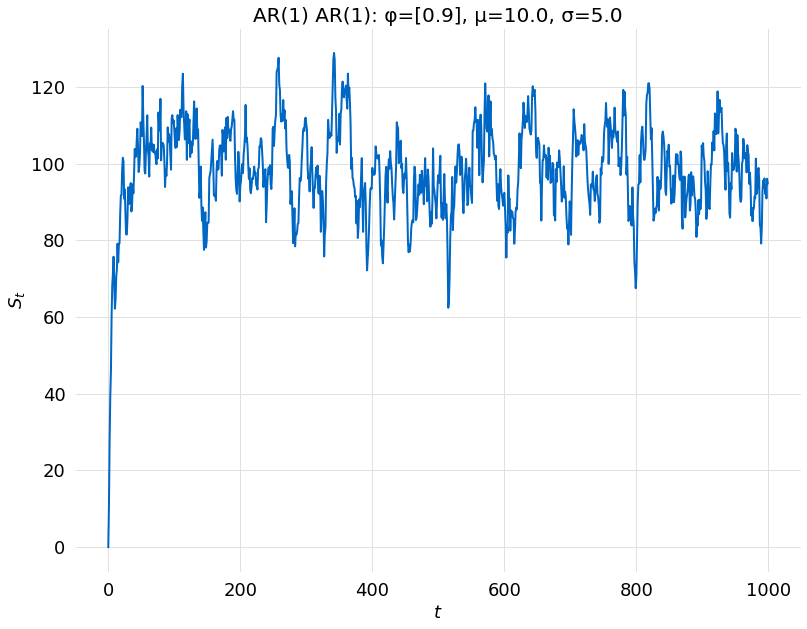

In [17]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
df = Source.AR_OFFSET.create(φ=[φ], μ=μ, σ=σ, npts=nsample)
curve(df)

In [18]:
results = Est.AR_OFFSET.perform(df, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3072.242
Date:                Sat, 18 Jun 2022   AIC                           6150.484
Time:                        16:36:26   BIC                           6165.207
Sample:                             0   HQIC                          6156.080
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.8403      2.316     41.807      0.000      92.300     101.380
ar.L1          0.9299      0.005    180.214      0.000       0.920       0.940
sigma2        27.2382      1.144     23.802      0.000      24.995      29.481
===================================================================================
Ljung-Box (L1) (Q):                   1.90   Jarque-Bera (JB):               210.67
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.35
Prob(H) (two-sided):                  0.27   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
df.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 16:36:26',
 'Type': <Source.AR_OFFSET: 'AR_OFFSET'>,
 'Name': 'AR(1)-Simulation-51b1260d-1e94-4dee-9dd3-fdb1d0049835',
 'SchemaIterations': None,
 'AR_OFFSET': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.9], 'μ': 10.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <Est.AR_OFFSET: 'AR_OFFSET'>,
    'Const': {'Estimate': 96.84028700243316,
     'Error': 2.316356840948661,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.9299430062615571,
      'Error': 0.005160220394959131,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'}],
    'Sigma2': {'Estimate': 27.2381763

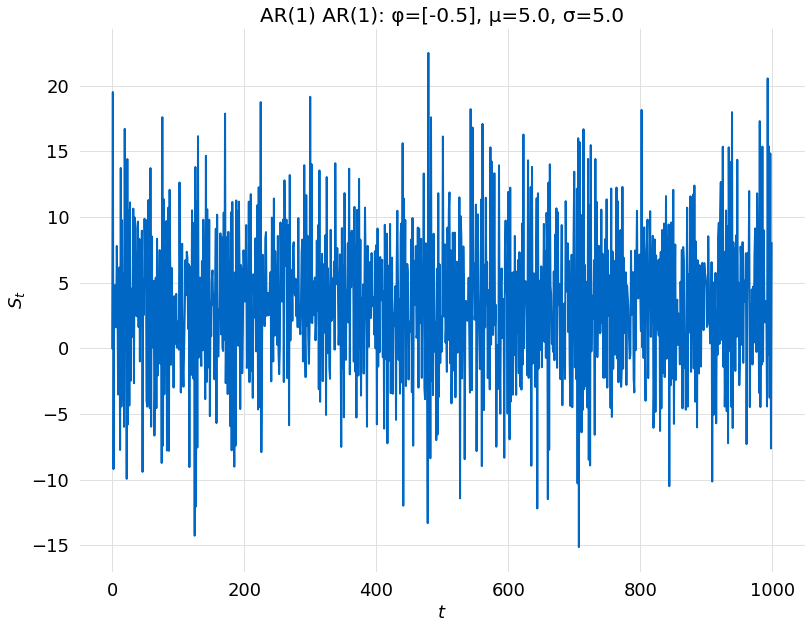

In [20]:
φ = -0.5
μ = 5.0
nsample = 1000
df = Source.AR_OFFSET.create(φ=[φ], μ=μ, σ=σ, npts=nsample)
curve(df)

In [21]:
results = Est.AR_OFFSET.perform(df, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3029.909
Date:                Sat, 18 Jun 2022   AIC                           6065.818
Time:                        16:36:26   BIC                           6080.541
Sample:                             0   HQIC                          6071.414
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3722      0.103     32.649      0.000       3.170       3.575
ar.L1         -0.5344      0.027    -19.643      0.000      -0.588      -0.481
sigma2        25.0683      1.136     22.058      0.000      22.841      27.296
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.52   Prob(JB):                         0.84
Heteroskedasticity (H):               0.96   Skew:                            -0.04
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
df.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '18/06/2022 16:36:26',
 'Type': <Source.AR_OFFSET: 'AR_OFFSET'>,
 'Name': 'AR(1)-Simulation-c058f478-e483-4e91-b5eb-ca749acbb65c',
 'SchemaIterations': None,
 'AR_OFFSET': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [-0.5], 'μ': 5.0, 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR_OFFSET(1)': {'Type': <Est.AR_OFFSET: 'AR_OFFSET'>,
    'Const': {'Estimate': 3.3721701426541397,
     'Error': 0.10328441308873605,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': -0.5343835038854473,
      'Error': 0.02720499951919793,
      'Estimate Label': '$\\hat{\\phi_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\\phi_{0}}}$'}],
    'Sigma2': {'Estimate': 25.0682